In [1]:
%matplotlib inline

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import pandas as pd
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA
from typing import Union

## Function Definition

In [3]:
def load_iris_df():
    """
    Load the iris data from scikit learn as a pandas dataframe
    """
    iris = datasets.load_iris()
    iris_df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
    iris_df['target'] = iris.target
    return iris_df

def sanity_outlier_plot(df : pd.DataFrame, ax : plt.axes):
    """
    Display a scatter plot of sepal width vs petal length for visual
    inspection
    
    Args:
        df (pd.DataFrame): dataframe with potential outliers
        ax (plt.axes): ax to plot on
    """
    df.plot.scatter(x='sepal width (cm)',y='petal length (cm)',ax=ax)
    
def remove_outliers(df : pd.DataFrame,inplace=False) -> Union[pd.DataFrame,None]:
    """
    Remove outliers from the dataframe passed in parameter. An outlier is defined as
    any value whose speal width > 2.5cm and whose petal length is > 2.0cm.
    
    Args:
        df (pd.DataFrame): dataframe to remove outliers from
        inplace (bool): whether to perform the operation inplace. Default to false
    
    Return:
        Union[None,pd.DataFrame]: either copied dataframe or None (if inplace)
        
    """
    if not inplace:
        df = df.copy()
    df.drop(df.index[(df['sepal width (cm)'] < 2.5) & (df['petal length (cm)'] < 2.0)],inplace=True)
    if not inplace:
        return df
    
def run_PCA(df : pd.DataFrame) -> pd.DataFrame:
    """
    Perform pca dimension reduction (3 dimensions) on the 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)' of the df 
    
    Args:
        df (pd.DataFrame): dataframe to remove outliers from
    
    Returns:
        [pd.DataFrame] : pca-reduced version of the
    """
    # One should separate computation and plotting functions
    X_reduced = PCA(n_components=3).fit_transform(df.drop(columns=['target']))
    reduced_df = pd.DataFrame(X_reduced)
    return reduced_df

def plot_3d(reduced_df : pd.DataFrame,target: pd.Series, ax: plt.axes):
    """
    Plot the pca-reduced dataframe on a 3-d plot
    
    Args:
        reduced_df (pd.DataFrame): dataframe obtained after a dimension reduction (3 dimensions)
        target (pd.Series): target designating the class of each sample
        ax (plt.axes): matplotlib ax
    """
    ax.scatter(
        reduced_df.iloc[:, 0],
        reduced_df.iloc[:, 1],
        reduced_df.iloc[:, 2],
        c=target,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

## Data Processing

In [4]:
iris_df = load_iris_df()
iris_tame_df = remove_outliers(iris_df)
reduced_df = run_PCA(iris_tame_df)

## Data Visualization

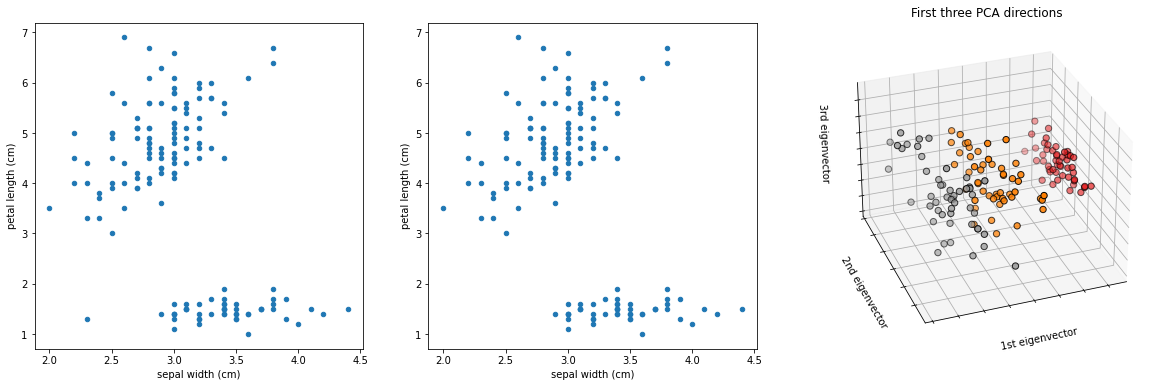

In [5]:
fig = plt.figure(1, figsize=(20, 6))
ax = fig.add_subplot(131)
sanity_outlier_plot(iris_df,ax=ax)

ax = fig.add_subplot(132)
sanity_outlier_plot(iris_tame_df,ax=ax)

ax = fig.add_subplot(133, projection="3d", elev=-150, azim=110)
plot_3d(reduced_df,iris_tame_df['target'],ax=ax)